<a href="https://colab.research.google.com/github/elisabm/deeplearning/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning con Keras**

### Clasificación de Zapatos

El objetivo de este proyecto es implementar una arquitectura de deep learning para solucionar un cierto problema. El problema a resolver es la clasificación de zapatos dadas sus respectivas imágenes. 

Este problema junto con los datos para resolverlo se obtuvo de la plataforma Kaggle. Se puede encontrar en el siguiente link: https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images. 

Aquí decidí utilizar Tensorflow y Keras porque son las librerías más eficientes para construir un modelo de redes neuronales.


### **Cargar la base de datos**

Aquí se van a jalar los datos que se usan para este proyecto directamente de Kaggle. 

In [2]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import opendatasets as od
import pandas
  
od.download(
    "https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: elisabonillama
Your Kaggle Key: ··········


100%|██████████| 47.0M/47.0M [00:03<00:00, 15.9MB/s]


### **Cargar las librerías**

Como ya mencione, en este proyecto se utilizan las líbrerias *Tensorflow* y *Keras* pero también se utilizan *Numpy* y *Matplotlib*.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator # untuk data augemntations
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Input, Dense, Flatten, MaxPooling2D
from tensorflow.keras import Sequential

### Generar los datos de validación y de entrenamiento

Aquí la variable *dir* representa los datos. Además de eso *train* son los datos que utilizaremos para entrenar el modelo y *validation* son los datos para probar nuestro modelo. 

In [5]:
dir = "shoe-vs-sandal-vs-boot-dataset-15k-images/Shoe vs Sandal vs Boot Dataset"

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect',
    validation_split=0.2 #Este será el porcentaje de nuestros datos que seran usados para la validación
)


In [6]:
train = datagen.flow_from_directory(
    dir,
    batch_size=64,
    target_size=(128,128),
    class_mode="categorical",
    subset="training"
)

Found 12000 images belonging to 3 classes.


In [7]:
validation = datagen.flow_from_directory(
    dir,
    batch_size=64,
    target_size=(128,128),
    class_mode="categorical",
    subset="validation",
)

Found 3000 images belonging to 3 classes.


### **Ver nuestros datos**

Para observar los datos lo que estamos cargando se utiliza el código a continuación.

(64, 128, 128, 3)


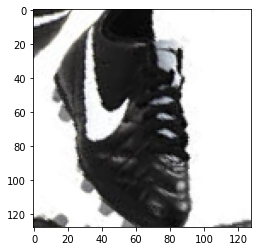

(64, 128, 128, 3)


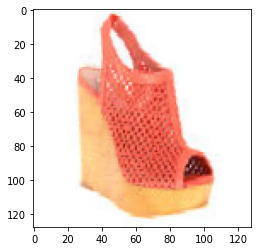

(64, 128, 128, 3)


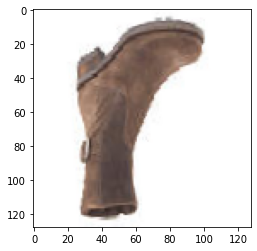

(64, 128, 128, 3)


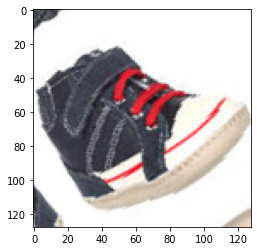

(64, 128, 128, 3)


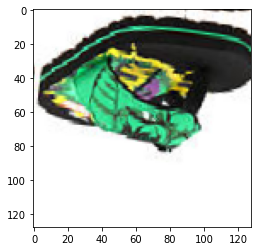

In [16]:
for i in range(5):
    img, label = train_im.next()
    print(img.shape) 
    plt.imshow(img[0])
    plt.show()

### **Creación del modelo**

Aquí se construye el modelo y explicare un poco más sobre las variables que se utilizan para construir la red. 

In [9]:
model = Sequential()

#Primera capa del modelo
model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (128,128,3)))

#filters: esta variable nos dice con cuántas caracteristicas nuestra red empieza a diferenciar
# Debido a que las imágenes de zapatos no son tan complejas decidí empezar por 16

#kernel_size: aquí se define el tamaño de la matriz que usamos para filtrar las imágenes

#padding: para evitar que todos los pixeles contribuyan de una manera similar se utiliza 'Same'

#activation: nuestra activación rectifies linear activation (ReLU)

#input_shape: es el tamaño de las imágenes y el 3 significa rgb (colores)


model.add(MaxPooling2D(pool_size=(2,2)))

#Se aplica pooling para reducir las dimensiones de nuestros feature maps para que los parámetros que nuestro modelo tenga que aprender sean menos.


In [10]:

#Segunda capa del modelo
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#Tercera capa del modelo
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#Cuarta capa del modelo
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


In [11]:
#Se conectan las capas anteriores con el output

model.add(Flatten())

#El feature map se transforma en un array de 1 dimensión con Flatten(), nos sirve para conectar las capas


model.add(Dense(500, activation = "relu")) 

#Se crea una capa completamente conectada y después nuestra capa output

model.add(Dense(3, activation = "softmax"))

# Se utiliza softmax para que la última capa nos de la probabilidad de distribución sobre las clases predecidas.
# El output de la función Softmax es a probabilidad de cada posible resultado de acuerdo con las diferentes clases.


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#loss: categorical_crossentropy es la función de pérdida quese utiliza normalmente en problemas de clasificación
#optimizer: minimiza la función

### **Probar el modelo**

A continuación se prueba el modelo con 50 épocas. 

In [12]:
history = model.fit(
    train,
    validation_data=validation,
    epochs=50,
    steps_per_epoch=len(train),
)

Epoch 1/50
188/188 [==============================] - 69s 313ms/step - loss: 0.8041 - accuracy: 0.6112 - val_loss: 0.5071 - val_accuracy: 0.7577
Epoch 2/50
188/188 [==============================] - 57s 304ms/step - loss: 0.4576 - accuracy: 0.8042 - val_loss: 0.3456 - val_accuracy: 0.8637
Epoch 3/50
188/188 [==============================] - 57s 306ms/step - loss: 0.3465 - accuracy: 0.8613 - val_loss: 0.2925 - val_accuracy: 0.8867
Epoch 4/50
188/188 [==============================] - 59s 315ms/step - loss: 0.2748 - accuracy: 0.8961 - val_loss: 0.2398 - val_accuracy: 0.9077
Epoch 5/50
188/188 [==============================] - 58s 310ms/step - loss: 0.2275 - accuracy: 0.9183 - val_loss: 0.2174 - val_accuracy: 0.9167
Epoch 6/50
188/188 [==============================] - 58s 307ms/step - loss: 0.1959 - accuracy: 0.9281 - val_loss: 0.2142 - val_accuracy: 0.9177
Epoch 7/50
188/188 [==============================] - 57s 305ms/step - loss: 0.1870 - accuracy: 0.9313 - val_loss: 0.1749 - val_ac

### **Probar el desempeño del modelo**

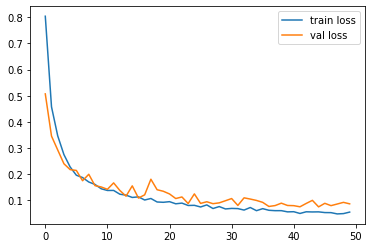

<Figure size 432x288 with 0 Axes>

In [13]:
#Aquí se grafican las pérdidas del modelo

acc = history.history['accuracy']                                                 
val_acc = history.history['val_accuracy']                                         
loss = history.history['loss']                                                    
val_loss = history.history['val_loss']                                            

epochs = range(len(acc)) 


plt.plot(loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')




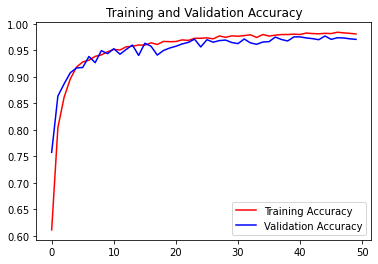

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [14]:
 #En esta gráfica vemos la precisión delo modelo  

plt.plot(epochs, acc, 'r', label='Training Accuracy')                                                 
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')                          
plt.title('Training and Validation Accuracy')                                        
plt.legend(loc=0)                                                                 
plt.figure()                                                                      
plt.show()  
plt.savefig('AccVal_acc')                                                    


### **Conclusiones Finales**

Realmente creo que los parámetros que escogí fueron bastante buenos porque hice una investigación profunda de como escogerlos sin tener contar el la prueba y error, lo hice de esta forma porque el tiempo que tarda en crearse el modelo es mucho.

De cualquier forma para la siguiente entrega me gustaría probar con diferentes parámetros. 